In [45]:
pip install pandas matplotlib


Note: you may need to restart the kernel to use updated packages.


In [46]:
import pandas as pd

# Load the 2020 dataset (replace the file path with your dataset path)
data_2020 = pd.read_csv("2020_election_results_with_state_code.csv")
data_2024 = pd.read_csv("2024_election_results_with_state_code.csv")

print(data_2020.head())
print(data_2024.head())

        STATE  Joseph R. Biden Votes  Joseph R. Biden %  Joseph R. Biden EV  \
0     Alabama               849624.0              36.57                 NaN   
1      Alaska               153778.0              42.77                 NaN   
2     Arizona              1672143.0              49.36                11.0   
3    Arkansas               423932.0              34.78                 NaN   
4  California             11110250.0              63.48                55.0   

   Donald Trump Votes  Donald Trump %  Donald Trump EV State_Code  
0           1441170.0           62.03              9.0         AL  
1            189951.0           52.83              3.0         AK  
2           1661686.0           49.06              NaN         AZ  
3            760647.0           62.40              6.0         AR  
4           6006429.0           34.32              NaN         CA  
        STATE  Kamala Harris Votes  Kamala Harris %  Kamala Harris EV  \
0     Alabama             769391.0          

Data Preprocessing - Identifying null values, and filling them with 0


In [47]:
#Filling the null values with 0
data_2020["Joseph R. Biden Votes"].fillna(0, inplace=True)
data_2020["Joseph R. Biden %"].fillna(0, inplace=True)
data_2020["Joseph R. Biden EV"].fillna(0, inplace=True)
data_2020["Donald Trump Votes"].fillna(0, inplace=True)
data_2020["Donald Trump %"].fillna(0, inplace=True)
data_2020["Donald Trump EV"].fillna(0, inplace=True)

data_2024["Kamala Harris Votes"].fillna(0, inplace=True)
data_2024["Kamala Harris %"].fillna(0, inplace=True)
data_2024["Kamala Harris EV"].fillna(0, inplace=True)
data_2024["Donald Trump Votes"].fillna(0, inplace=True)
data_2024["Donald Trump %"].fillna(0, inplace=True)
data_2024["Donald Trump EV"].fillna(0, inplace=True)

## Standardize column names
data_2020.rename(columns={"Joseph R. Biden Votes": "Biden Votes","Joseph R. Biden %": "Biden %","Joseph R. Biden EV": "Biden EV",  "Donald Trump Votes": "Trump Votes", "Donald Trump %": "Trump %","Donald Trump EV": "Trump EV"}, inplace=True)
data_2024.rename(columns={"Kamala Harris Votes": "Kamala Votes", "Kamala Harris %": "Kamala %", "Kamala Harris EV": "Kamala EV","Donald Trump Votes": "Trump Votes", "Donald Trump %": "Trump %","Donald Trump EV": "Trump EV"}, inplace=True)


print(data_2020.head())

print(data_2024.head())


#making  a copy of the data
copy_data_2020 = data_2020.copy()
copy_data_2024 = data_2024.copy()


        STATE  Biden Votes  Biden %  Biden EV  Trump Votes  Trump %  Trump EV  \
0     Alabama     849624.0    36.57       0.0    1441170.0    62.03       9.0   
1      Alaska     153778.0    42.77       0.0     189951.0    52.83       3.0   
2     Arizona    1672143.0    49.36      11.0    1661686.0    49.06       0.0   
3    Arkansas     423932.0    34.78       0.0     760647.0    62.40       6.0   
4  California   11110250.0    63.48      55.0    6006429.0    34.32       0.0   

  State_Code  
0         AL  
1         AK  
2         AZ  
3         AR  
4         CA  
        STATE  Kamala Votes  Kamala %  Kamala EV  Trump Votes  Trump %  \
0     Alabama      769391.0      34.1          0    1457704.0     64.6   
1      Alaska      139812.0      41.4          0     184204.0     54.5   
2     Arizona     1582860.0      46.7          0    1770242.0     52.2   
3    Arkansas      396905.0      33.5          0     759241.0     64.2   
4  California     9183800.0      58.6         54    5

**Q1) Process one collection of data and summarize information from several fields.**

We will take the 2024_election_results_with_state_code data first

Here I have done the summarization of the 2024 (current) presidential elections and summarizing the total votes each candidate has recieved, Total % recieved and total EV votes recieved

In [56]:
# Summarize total votes and percentage for each candidate
summary_2024 = {
    "Total Votes (Kamala)": copy_data_2024["Kamala Votes"].sum(),
    "Average % (Kamala)": copy_data_2024["Kamala %"].mean(),
    "Total Electoral Votes (Kamala)": copy_data_2024["Kamala EV"].sum(),
    "Total Votes (Trump)": copy_data_2024["Trump Votes"].sum(),
    "Average % (Trump)": copy_data_2024["Trump %"].mean(),
    "Total Electoral Votes (Trump)": copy_data_2024["Trump EV"].sum(),
}

# Convert to DataFrame for display
summary_df_2024 = pd.DataFrame([summary_2024])
print("Summary of 2024 Election Data")
print(summary_df_2024)

#save the dataframe as a csv file
summary_df_2024.to_csv("summary_df_2024_Q1.csv")


Summary of 2024 Election Data
   Total Votes (Kamala)  Average % (Kamala)  Total Electoral Votes (Kamala)  \
0            73857695.0           43.501961                             266   

   Total Votes (Trump)  Average % (Trump)  Total Electoral Votes (Trump)  
0           76943544.0          50.619608                          253.0  




**Key Findings from this Q1 analysis:**
1) We can see that in 2024 elections, **Kamala Harris** recieved **73857695** total votes and her average percentage was **43.50%**
2) On the other hand, we can see that **Donald Trump** has recieved **76943544** total votes and his average percentage was **50.61**
3) Additionally one interesting thing which we can notice is Total Electoral votes of kamala harris is 266 and that of donald trump is 253 which is less than kamala. This usually happens when:
   
   a) **Kamala Wins High-EV States:**

    Kamala's EVs are higher because she likely won states like California, New York, Illinois, and other Democratic-leaning large states with significant EV counts.
    These states contribute disproportionately to her EV total.
    Trump Wins Popular Vote in Strongholds:

    b) **Trump wins more total popular votes due to sweeping victories in Republican strongholds (e.g., Alabama, Texas, and other rural states).**
    These states often have fewer EVs relative to their population sizes.
    Overall Summary:

**Kamala Harris: Secured 266 EVs by winning key states with high EV counts.**

**Donald Trump: Secured 253 EVs despite having more total popular votes because his victories were concentrated in smaller states with lower EVs**


**Q2) Process one collection of data and separate it into different categories and
provided summary statistics on those categories.**

Categorize the 2024 Data
Categorize states into:
Kamala Stronghold: Kamala Harris won > 60%.
Trump Stronghold: Donald Trump won > 60%.
Swing State: Neither candidate received > 60%.

In [57]:
# Categorize states based on vote percentages
def categorize_state(row):
    if row["Kamala %"] > 60:
        return "Kamala Stronghold"
    elif row["Trump %"] > 60:
        return "Trump Stronghold"
    else:
        return "Swing State"

copy_data_2024["Category"] = copy_data_2024.apply(categorize_state, axis=1)

# Provide summary statistics for each category
category_summary = copy_data_2024.groupby("Category").agg({
    "Kamala Votes": "sum",
    "Trump Votes": "sum",
    "Kamala %": "mean",
    "Trump %": "mean",
    "STATE": "count"
}).rename(columns={"STATE": "Number of States"})

# Save the summary to a CSV
category_summary.to_csv("category_summary_2024_Q2.csv")
print("\nCategory Summary Statistics (2024 Elections):")
print(category_summary)

data_2024.head()
copy_data_2024.head()


Category Summary Statistics (2024 Elections):
                   Kamala Votes  Trump Votes   Kamala %    Trump %  \
Category                                                             
Kamala Stronghold     4170909.0    2568970.0  62.466667  34.433333   
Swing State          64244101.0   64046111.0  45.525000  47.063889   
Trump Stronghold      5442685.0   10328463.0  32.691667  65.333333   

                   Number of States  
Category                             
Kamala Stronghold                 3  
Swing State                      36  
Trump Stronghold                 12  


,STATE,Kamala Votes,Kamala %,Kamala EV,Trump Votes,Trump %,Trump EV,State_Code,Category
0,Alabama,769391.0,34.1,0,1457704.0,64.6,9.0,AL,Trump Stronghold
1,Alaska,139812.0,41.4,0,184204.0,54.5,3.0,AK,Swing State
2,Arizona,1582860.0,46.7,0,1770242.0,52.2,11.0,AZ,Swing State
3,Arkansas,396905.0,33.5,0,759241.0,64.2,6.0,AR,Trump Stronghold
4,California,9183800.0,58.6,54,5988823.0,38.2,0.0,CA,Swing State


**Key Analysis from this Q2 performed:**


1) Category Classification: States are categorized as **Kamala Stronghold**, **Trump Stronghold**, or **Swing State** based on vote percentages (>60% support for a candidate indicates a stronghold; otherwise, it's a Swing State).

2) Swing States Dominate: The majority of states (36 out of 51) are categorized as Swing States, reflecting a competitive electoral environment where neither candidate secured overwhelming support.

3) Stronghold Analysis:

    a) Kamala Stronghold: Only **3** states showed strong support for Kamala Harris (>60% votes), with a combined total of **~4.17M** votes for her.
    
    b)Trump Stronghold: Trump dominated in **12 states** (>60% votes), gathering **~10.33M** votes in these regions.
    
    c) Vote Averages: Swing States have a more balanced average percentage split **(Kamala: ~45.5%, Trump: ~47%)**, indicating close contests in these states.


**Q3) After the first collection is processed somehow join that or relate it to the
second data set. (Whether the second one is summarized or not is up to you)**

Here we will join the 2020_election_results_with_state_code dataset with the 2024 one based on the common column named state code
we will also derive 4 new columns for further analysis

In [54]:
# Merge 2020 and 2024 datasets on State_Code
merged_data = pd.merge(data_2020, data_2024, on="State_Code", how="outer", suffixes=("_2020", "_2024"))

# Calculate percentage and vote changes
merged_data["Kamala-Biden % Change"] = merged_data["Kamala %"] - merged_data["Biden %"]
merged_data["Trump % Change"] = merged_data["Trump %_2024"] - merged_data["Trump %_2020"]

merged_data["Kamala-Biden Vote Change"] = merged_data["Kamala Votes"] - merged_data["Biden Votes"]
merged_data["Trump Vote Change"] = merged_data["Trump Votes_2024"] - merged_data["Trump Votes_2020"]

# Drop the last row using iloc
merged_data = merged_data.iloc[:-1]


# Save the merged data with changes to a CSV
merged_data.to_csv("merged_2020_2024_elections.csv", index=False)
print("\nMerged 2020 and 2024 Election Data with Changes:")
print(merged_data.head())



Merged 2020 and 2024 Election Data with Changes:
   STATE_2020  Biden Votes  Biden %  Biden EV  Trump Votes_2020  Trump %_2020  \
0     Alabama     849624.0    36.57       0.0         1441170.0         62.03   
1      Alaska     153778.0    42.77       0.0          189951.0         52.83   
2     Arizona    1672143.0    49.36      11.0         1661686.0         49.06   
3    Arkansas     423932.0    34.78       0.0          760647.0         62.40   
4  California   11110250.0    63.48      55.0         6006429.0         34.32   

   Trump EV_2020 State_Code  STATE_2024  Kamala Votes  Kamala %  Kamala EV  \
0            9.0         AL     Alabama      769391.0      34.1        0.0   
1            3.0         AK      Alaska      139812.0      41.4        0.0   
2            0.0         AZ     Arizona     1582860.0      46.7        0.0   
3            6.0         AR    Arkansas      396905.0      33.5        0.0   
4            0.0         CA  California     9183800.0      58.6       54.

**Key Analysis finding from Q3:**

The new columns, like **% Change** and **Vote Change**, quantify shifts in voter support and turnout between 2020 and 2024, highlighting trends like Kamala Harris's drop in traditionally Democratic states (e.g., California) and Trump's gains in swing states (e.g., Arizona). These columns simplify analysis, identify battleground shifts, and make performance comparisons straightforward. They are crucial for understanding evolving voter dynamics and informing future campaign strategies. This structured insight enables targeted decision-making for political analysts.

**Q4) Process two or more collections of data and compare some summary data about
the two collections together.**


In [69]:
# Summarize 2020 data
summary_2020 = {
    "Total Votes (Biden)": copy_data_2020["Biden Votes"].sum(),
    "Average % (Biden)": copy_data_2020["Biden %"].mean(),
    "Total Electoral Votes (Biden)": copy_data_2020["Biden EV"].sum(),
    "Total Votes (Trump)": copy_data_2020["Trump Votes"].sum(),
    "Average % (Trump)": copy_data_2020["Trump %"].mean(),
    "Total Electoral Votes (Trump)": copy_data_2020["Trump EV"].sum(),
}

# Combine summaries into a DataFrame
comparison_df = pd.DataFrame([summary_2020, summary_2024], index=["2020 Election", "2024 Election"])



comparison_df["Total Votes (Biden)"].fillna(0, inplace=True)
comparison_df["Average % (Biden)"].fillna(0, inplace=True)
comparison_df["Total Electoral Votes (Biden)"].fillna(0, inplace=True)
comparison_df["Total Votes (Kamala)"].fillna(0, inplace=True)
comparison_df["Average % (Kamala)"].fillna(0, inplace=True)
comparison_df["Total Electoral Votes (Kamala)"].fillna(0, inplace=True)



# Save the comparison to a CSV
comparison_df.to_csv("comparison_2020_2024_summary.csv")
print("\nComparison of 2020 and 2024 Elections:")

print(comparison_df.head())



Comparison of 2020 and 2024 Elections:
               Total Votes (Biden)  Average % (Biden)  \
2020 Election           81268773.0          47.703077   
2024 Election                  0.0           0.000000   

               Total Electoral Votes (Biden)  Total Votes (Trump)  \
2020 Election                          345.0           74216728.0   
2024 Election                            0.0           76943544.0   

               Average % (Trump)  Total Electoral Votes (Trump)  \
2020 Election          48.268462                          183.0   
2024 Election          50.619608                          253.0   

               Total Votes (Kamala)  Average % (Kamala)  \
2020 Election                   0.0            0.000000   
2024 Election            73857695.0           43.501961   

               Total Electoral Votes (Kamala)  
2020 Election                             0.0  
2024 Election                           266.0  


**Key Analysis findings from Q4)**

The comparison shows a significant shift in Electoral Votes: Biden secured **345 EVs in 2020**, while Kamala Harris achieved only **266 EVs in 2024**, indicating Democratic losses. Trump's **votes and percentage increased** from **74.2M (48.27%) in 2020** to **76.9M (50.62%) in 2024**, reflecting stronger Republican support. Kamala Harris's **vote count and percentage (43.50%)** were lower than Biden's **(47.70%)**, highlighting a notable decline in Democratic voter turnout or support. This demonstrates a Republican advantage and key challenges for Democrats.

**Q5) Other Ways of Analysis on merged_df**

1) **Vote Percentage Change Analysis**

This analysis highlights how voter preferences shifted between 2020 and 2024, showing which states had significant swings in support for Kamala Harris and Donald Trump.
    

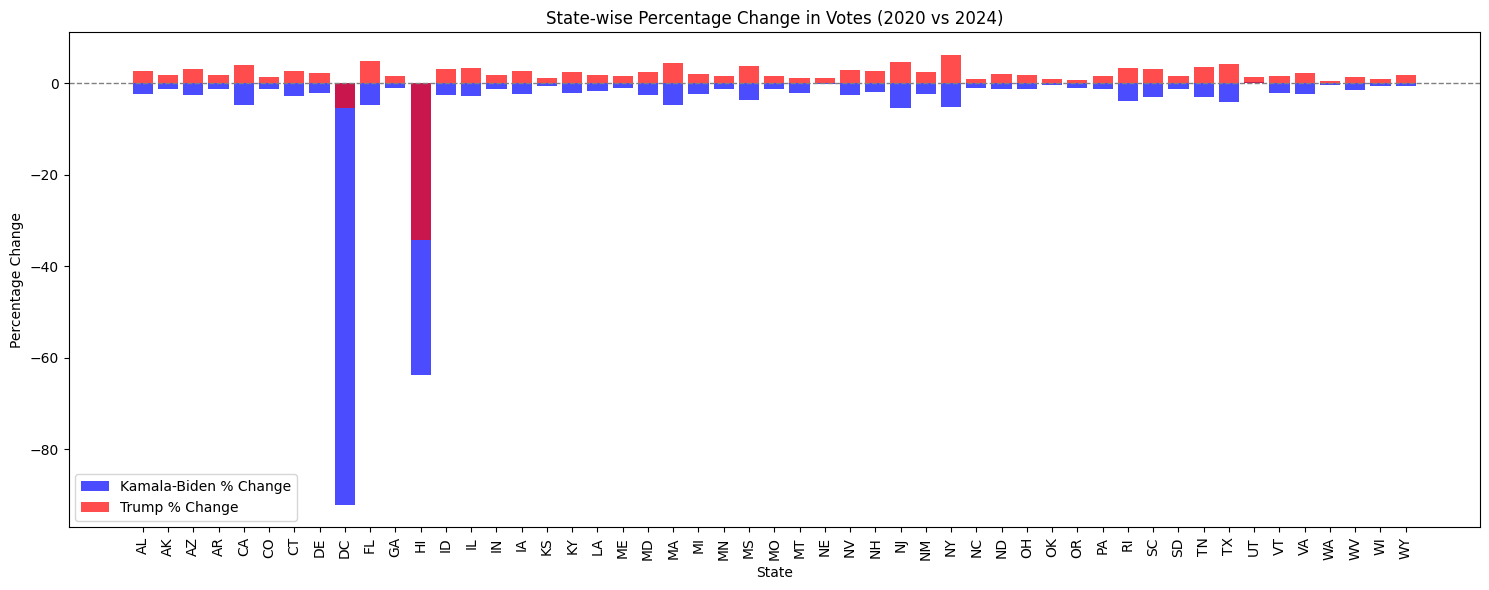

In [74]:
import matplotlib.pyplot as plt

# Plot percentage change for Kamala and Trump
plt.figure(figsize=(15, 6))
plt.bar(merged_data["State_Code"], merged_data["Kamala-Biden % Change"], label="Kamala-Biden % Change", alpha=0.7, color='blue')
plt.bar(merged_data["State_Code"], merged_data["Trump % Change"], label="Trump % Change", alpha=0.7, color='red')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title("State-wise Percentage Change in Votes (2020 vs 2024)")
plt.xlabel("State")
plt.ylabel("Percentage Change")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()



**Key findings:**

This graph illustrates the percentage change in voter support for **Kamala Harris (blue bars)** and **Donald Trump (red bars)** between the 2020 and 2024 elections across different states.

**Blue Bars (Kamala-Biden % Change)**: These bars represent how much the percentage of votes for Kamala Harris in 2024 differed from Joe Biden's percentage in 2020. Negative values indicate a decline in support, while positive values suggest an increase.

**Red Bars (Trump % Change):** These bars show the percentage change in support for Donald Trump between the two elections. Positive values indicate increased support, and negative values reflect decreased support.

Observations:

The largest blue bar drop is in Washington, D.C. (DC), where Kamala Harris experienced a significant decline compared to Biden in 2020. This could be due to various factors, such as voter turnout or changing demographics.

In most states, Trump’s red bars are either positive or close to zero, suggesting a slight increase or stability in his support.
A few states, like Florida and Texas, show a clear increase in Trump’s percentage (positive red bars) while Kamala Harris's percentage dropped (negative blue bars), highlighting a shift toward Trump in these regions.

**2. State-wise Election Results Visualization: 2024 Presidential Race -  A Map**

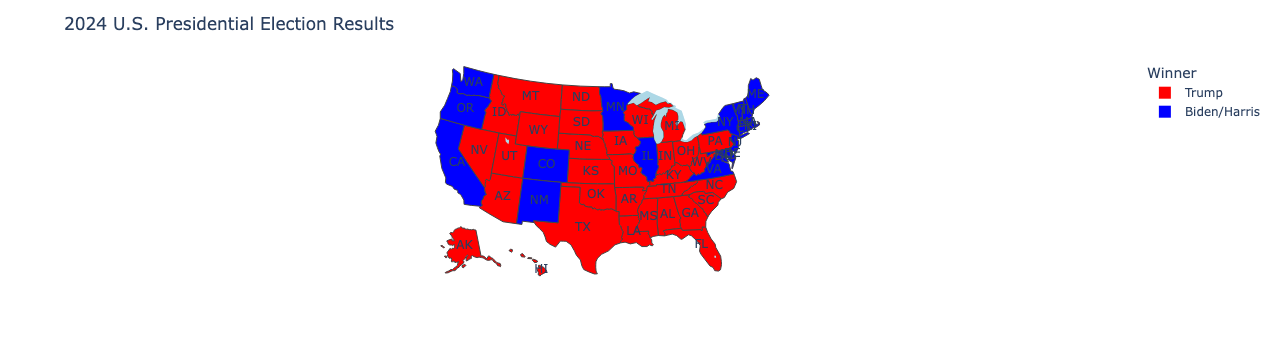

In [80]:
# Determine the winner for each state
def determine_winner(row):
    if row["Kamala %"] > row["Trump %_2024"]:
        return "Biden/Harris"
    else:
        return "Trump"

merged_data["Winner"] = merged_data.apply(determine_winner, axis=1)

# Create the map using Plotly Express
fig = px.choropleth(
    merged_data,
    locations="State_Code",  # Column containing state abbreviations
    locationmode="USA-states",  # Map to USA states
    color="Winner",  # Column containing the winner (Biden/Harris or Trump)
    hover_name="STATE_2020",  # Info to show on hover
    scope="usa",  # Map scope limited to the USA
    color_discrete_map={"Trump": "red", "Biden/Harris": "blue"},  # Assign colors
)

# Add state labels on the map
for i, row in merged_data.iterrows():
    fig.add_scattergeo(
        locationmode='USA-states',
        locations=[row["State_Code"]],
        text=row["State_Code"],
        mode='text',
        showlegend=False
    )

# Update layout for better visualization
fig.update_layout(
    title_text="2024 U.S. Presidential Election Results",
    geo=dict(showlakes=True, lakecolor="lightblue"),
)

# Show the map
fig.show()

**Key findings:**


1. **Regional Political Preferences**: The map highlights the regional divides in the 2024 presidential election, with strongholds for Trump in the southern and midwestern states, and significant support for Kamala Harris in the west and northeast.

2. **Swing State Importance**: States such as Arizona, Pennsylvania, and Wisconsin remain critical battlegrounds with close contests, emphasizing their continued significance in deciding the election outcome.

3. **State-by-State Insights**: The addition of state labels (state codes) makes it easy to identify specific states, enabling a detailed analysis of how individual states contributed to the overall electoral results.